# 拍拍贷用户违约情况分析
***

* 分析目的：通过分析拍拍贷用户借款的相关数据，提取出违约用户的相关特征，找出哪类用户更可能违约，  
&emsp;&emsp;&emsp;&emsp;&emsp;从而初步描绘出更可能违约的用户画像  
* 分析思路：先对借款用户总体信息进行考察，了解不同特征用户分布情况，再分析不同特征用户的违约情况，  
&emsp;&emsp;&emsp;&emsp;&emsp;最后整合出更可能违约的用户相关特征  

> 数据来源于网络，拍拍贷2015-2017的相关业务数据，已脱敏  
所用到的数据有两部分：LC(Loan Characteristics)即标的特征表、LP(Loan Periodic)即标的还款计划和还款记录表
***

In [1]:
#导入数据分析库包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#预设画布显示
% matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.sans-serif'] =['SimHei']
plt.style.use('ggplot')

# 一.  数据预览

## 1.1  LC(Loan Characteristics)

In [3]:
#导入LC数据集
LC=pd.read_csv('F:/LC.csv')

In [4]:
LC.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,...,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,...,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,...,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [5]:
#修改ListingId为单号，更整齐
LC.rename(columns={'ListingId':'单号'},inplace=True)

In [6]:
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
单号          328553 non-null int64
借款金额        328553 non-null int64
借款期限        328553 non-null int64
借款利率        328553 non-null float64
借款成功日期      328553 non-null object
初始评级        328553 non-null object
借款类型        328553 non-null object
是否首标        328553 non-null object
年龄          328553 non-null int64
性别          328553 non-null object
手机认证        328553 non-null object
户口认证        328553 non-null object
视频认证        328553 non-null object
学历认证        328553 non-null object
征信认证        328553 non-null object
淘宝认证        328553 non-null object
历史成功借款次数    328553 non-null int64
历史成功借款金额    328553 non-null float64
总待还本金       328553 non-null float64
历史正常还款期数    328553 non-null int64
历史逾期还款期数    328553 non-null int64
dtypes: float64(3), int64(7), object(11)
memory usage: 52.6+ MB


数据有328553条，21个字段，无缺失值  
字段字典如下：  
> 单号：列表的序号，即标的序号  
借款金额：列表成交总金额  
借款期限：总的期数（按月计）  
借款利率：年化利率（百分数）  
借款成功日期：列表成交的日期，都在2015年1月1日以后  
初始评级：列表成交时的信用评级，AAA为安全标，AA为赔标，A-F为信用等级  
借款类型：分为'应收安全标'，‘电商’，‘APP闪电’，‘普通’和‘其他’  
是否首标：该标是否为借款人首标  
年龄：借款人在该列表借款成功时的年龄  
性别：该列表借款人性别  
手机认证：该列表借款人手机实名认证是否成功  
户口认证：该列表借款人户口认证是否成功  
视频认证：该列表借款人视频认证是否成功  
学历认证：该列表借款人学历认证是否成功，成功则表示有大专及以上学历  
征信认证：该列表借款人征信认证是否成功，成功则表示有人行征信报告  
淘宝认证：该列表借款人淘宝认证是否成功，成功则表示为淘宝店主  
历史成功借款次数：借款人在该列表成交之前的借款成功次数  
历史成功借款金额：借款人在该列表成交之前的借款成功金额  
总待还本金：借款人在该列表成交之前待还本金金额  
历史正常还款期数：借款人在该列表成交之前的按期还款期数  
历史逾期还款期数：借款人在该列表成交之前的逾期还款期数  

In [7]:
LC.describe()

,单号,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
count,3.285530e+05,328553.000000,328553.000000,328553.000000,328553.000000,328553.000000,3.285530e+05,3.285530e+05,328553.000000,328553.000000
mean,1.907948e+07,4423.816906,10.213594,20.601439,29.143042,2.323159,8.785857e+03,3.721665e+03,9.947658,0.423250
std,8.375769e+06,11219.664024,2.780444,1.772408,6.624286,2.922361,3.502736e+04,8.626061e+03,14.839899,1.595681
min,1.265410e+05,100.000000,1.000000,6.500000,17.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.190887e+07,2033.000000,6.000000,20.000000,24.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,1.952325e+07,3397.000000,12.000000,20.000000,28.000000,2.000000,5.000000e+03,2.542410e+03,5.000000,0.000000
75%,2.629862e+07,5230.000000,12.000000,22.000000,33.000000,3.000000,1.035500e+04,5.446810e+03,13.000000,0.000000
max,3.281953e+07,500000.000000,24.000000,24.000000,56.000000,649.000000,7.405926e+06,1.172653e+06,2507.000000,60.000000


可以看到：  
* 借款平均金额有4423，最小借款100，最大借款500000,1/4分位和中位值为2033和3397，可见借款以小额贷款为主  
* 借款期限平均10.2期，最小1期，最大24期，中位和3/4分位值都为12，即分期12期最为普遍  
* 借款年利率均值20.6%，最少6.5%，最大24%，各分位值利率相当，可见利率总体比较一致  
* 借款用户平均年龄29岁，最小17岁，最大56岁，可见年龄分位值在20-35间的借款人数最多  
* 历史成功借款次数均值2.3次，最大649次，中位数2，可见多数用户借款频次不高，不超过3次  
* 历史借款金额平均约8786，结合历史平均借款约2次，即历史单次借款金额约4300，与当前借款金额平均值相当，比较稳定  
* 历史平均正常还款期数和逾期还款期数分别为14.8期和1.59期，比例约7:1

## 1.2  LP(Loan Periodic)

In [8]:
#导入LP数据集
LP=pd.read_csv('F:/LP.csv')

In [9]:
LP.head()

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22
2,126541,3,1,1421.95,228.28,0.0,0.0,2015-08-04,2015-08-04,2017-02-22
3,126541,4,1,1443.28,206.95,0.0,0.0,2015-09-04,2015-09-04,2017-02-22
4,126541,5,1,1464.93,185.30,0.0,0.0,2015-10-04,2015-10-04,2017-02-22


In [10]:
#同样地，修改列名使之一致
LP.rename(columns={'ListingId':'单号','recorddate':'记录日期'},inplace=True)

In [11]:
LP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
单号      int64
期数      int64
还款状态    int64
应还本金    float64
应还利息    float64
剩余本金    float64
剩余利息    float64
到期日期    object
还款日期    object
记录日期    object
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB


数据有3203276条，有10个字段  
字段字典如下：  
> 单号：列表的序号，即标的序号  
期数：该期还款的期数号  
还款状态：到记录日的当期状态，分为0-‘未还款’，1-‘已正常还款’，2-‘已逾期还款’，3-‘已提前还清该标全部欠款’，4-‘已部分还款’  
应还本金：当期计划还款本金部分  
应还利息：当期计划还款利息部分  
剩余本金：到记录日，仍未还清的当期本金  
剩余利息：到记录日，仍未还清的当期利息  
到期日期：当期应还款日  
还款日期：当期最近一次实际还款日期  
记录日期：记录列表的日期  

In [12]:
LP.describe()

,单号,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息
count,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06,3.203276e+06
mean,1.947391e+07,5.904377e+00,6.037828e-01,4.604506e+02,4.232540e+01,1.846682e+02,1.472581e+01
std,8.312219e+06,3.455267e+00,6.684636e-01,2.041906e+03,8.346626e+01,4.012435e+02,2.999337e+01
min,1.265410e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.222287e+07,3.000000e+00,0.000000e+00,1.881500e+02,1.301000e+01,0.000000e+00,0.000000e+00
50%,2.025666e+07,6.000000e+00,1.000000e+00,3.309400e+02,2.978000e+01,0.000000e+00,0.000000e+00
75%,2.661693e+07,9.000000e+00,1.000000e+00,5.123400e+02,5.539000e+01,2.991400e+02,1.968000e+01
max,3.281953e+07,2.400000e+01,4.000000e+00,5.000000e+05,1.875000e+04,1.000000e+05,3.978370e+03


可以看到：  
* 由于此处期数为还款的期数号，故而约为还款总期数的1/2，均值5.9期与前符合  
* 还款状态0.6，略远离0，由于还款状态为0的包括已到期不还款和尚未到期的，需后续讨论  
* 应还本金均值4600，与前借款金额比较一致  

# 二.  数据预处理

## 2.1  LC表预处理

In [13]:
#查看单号是否唯一
LC['单号'].unique().shape

(328553,)

In [14]:
#借款成功日期格式转为时间类型
LC['借款成功日期']=pd.to_datetime(LC['借款成功日期'])

In [15]:
#统一各认证项，添加‘认证成功项目数’进行评估
qualify={'成功认证':1,'未成功认证':0}
LC=LC.assign(A=lambda x:x[['手机认证','户口认证','视频认证','学历认证','征信认证','淘宝认证']].applymap(lambda x:qualify[x]).apply(np.sum,axis=1))
LC.rename(columns={'A':'认证成功项目数'},inplace=True)
LC.head()

,单号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,认证成功项目数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16,2
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,...,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3,1
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,...,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1,3
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,...,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14,3


## 2.2 LP表预处理

In [16]:
#查看不重复单号数是否与LC表相对应
LP['单号'].unique().shape

(328553,)

In [17]:
#查看是否有缺失值
LP.isnull().sum()

单号      0
期数      0
还款状态    0
应还本金    0
应还利息    0
剩余本金    0
剩余利息    0
到期日期    0
还款日期    0
记录日期    0
dtype: int64

In [18]:
#日期字段转为时间类型
LP['到期日期']=pd.to_datetime(LP['到期日期'])
#此列格式或有问题，指定不报错
LP['还款日期']=pd.to_datetime(LP['还款日期'],errors='coerce')
LP['记录日期']=pd.to_datetime(LP['记录日期'])

In [19]:
#考察还款方式
LP['应还本息和']=LP['应还本金']+LP['应还利息']
LP.head(30)

,单号,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,记录日期,应还本息和
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22,1650.23
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22,1650.23
2,126541,3,1,1421.95,228.28,0.0,0.0,2015-08-04,2015-08-04,2017-02-22,1650.23
3,126541,4,1,1443.28,206.95,0.0,0.0,2015-09-04,2015-09-04,2017-02-22,1650.23
4,126541,5,1,1464.93,185.30,0.0,0.0,2015-10-04,2015-10-04,2017-02-22,1650.23
5,126541,6,1,1486.90,163.33,0.0,0.0,2015-11-04,2015-11-04,2017-02-22,1650.23
6,126541,7,2,1509.21,141.02,0.0,0.0,2015-12-04,2015-12-05,2017-02-22,1650.23
7,126541,8,1,1531.85,118.38,0.0,0.0,2016-01-04,2016-01-04,2017-02-22,1650.23
8,126541,9,2,1554.82,95.41,0.0,0.0,2016-02-04,2016-02-05,2017-02-22,1650.23
9,126541,10,2,1578.15,72.08,0.0,0.0,2016-03-04,2016-03-06,2017-02-22,1650.23


观察数据，分期所用还款方式应是等额本息法

In [20]:
#考察是否规范
payment_method=LP.groupby('单号')['应还本息和'].var()
payment_method.head(10) 

单号
126541    0.000000e+00
133291    7.049835e-27
142421    1.524326e+07
149711    8.905301e+01
152141    0.000000e+00
162641    2.824518e+05
171191    5.169879e-27
175451    1.879956e-26
182261    4.348154e+05
193831    3.101927e-26
Name: 应还本息和, dtype: float64

若是等额本息法按月还款，除了首末月还款金额有所不同外，其余月份应该相同  
首末月与其他月份差别不大时，方差值应不大于10  
考察表中不符合的项

In [21]:
LP[LP['单号']==142421]

,单号,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,记录日期,应还本息和
24,142421,1,1,924.18,450.00,0.00,0.00,2016-05-26,2016-05-26,2017-02-22,1374.18
25,142421,2,1,939.59,434.59,0.00,0.00,2016-06-26,2016-06-26,2017-02-22,1374.18
26,142421,3,1,955.25,418.93,0.00,0.00,2016-07-26,2016-07-25,2017-02-22,1374.18
27,142421,4,1,971.17,403.01,0.00,0.00,2016-08-26,2016-08-24,2017-02-22,1374.18
28,142421,5,1,987.35,386.83,0.00,0.00,2016-09-26,2016-09-25,2017-02-22,1374.18
29,142421,6,1,1003.81,370.37,0.00,0.00,2016-10-26,2016-10-25,2017-02-22,1374.18
30,142421,7,1,1020.54,353.64,0.00,0.00,2016-11-26,2016-11-26,2017-02-22,1374.18
31,142421,8,3,20198.11,302.97,0.00,0.00,2016-12-26,2016-12-23,2017-02-22,20501.08
32,142421,9,0,1054.84,319.34,1054.84,319.34,2017-01-26,NaT,2017-02-22,1374.18
33,142421,10,0,1072.42,301.76,1072.42,301.76,2017-02-26,NaT,2017-02-22,1374.18


该标分24期，可以看到在第8期时已提前还款，后续期数应删除

In [22]:
LP[LP['单号']==162641]

,单号,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,记录日期,应还本息和
66,162641,1,1,1562.41,233.33,0.0,0.0,2015-04-25,2015-04-24,2017-02-22,1795.74
67,162641,2,1,1580.64,215.10,0.0,0.0,2015-05-25,2015-05-25,2017-02-22,1795.74
68,162641,3,1,1599.08,196.66,0.0,0.0,2015-06-25,2015-06-25,2017-02-22,1795.74
69,162641,4,1,1617.74,178.00,0.0,0.0,2015-07-25,2015-07-25,2017-02-22,1795.74
70,162641,5,1,1636.61,159.13,0.0,0.0,2015-08-25,2015-08-25,2017-02-22,1795.74
71,162641,6,1,1655.70,140.04,0.0,0.0,2015-09-25,2015-09-25,2017-02-22,1795.74
72,162641,7,2,1675.02,120.72,0.0,0.0,2015-10-25,2015-10-26,2017-02-22,1795.74
73,162641,8,1,1694.56,101.18,0.0,0.0,2015-11-25,2015-11-25,2017-02-22,1795.74
74,162641,9,1,1714.33,81.41,0.0,0.0,2015-12-25,2015-12-25,2017-02-22,1795.74
75,162641,10,1,1734.33,61.41,0.0,0.0,2016-01-25,2016-01-25,2017-02-22,1795.74


同样地，该标有12期，在11期时提前还款  

In [23]:
#因到期日期在记录日期之后的还款情况未知，故应删除，同时也排除提前还款后无效的期数记录
#仅保留记录日期时已知还款情况的单号
LP=LP[LP['到期日期']<=LP['记录日期']]

In [24]:
LP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600898 entries, 0 to 3117188
Data columns (total 11 columns):
单号       1600898 non-null int64
期数       1600898 non-null int64
还款状态     1600898 non-null int64
应还本金     1600898 non-null float64
应还利息     1600898 non-null float64
剩余本金     1600898 non-null float64
剩余利息     1600898 non-null float64
到期日期     1600898 non-null datetime64[ns]
还款日期     1547990 non-null datetime64[ns]
记录日期     1600898 non-null datetime64[ns]
应还本息和    1600898 non-null float64
dtypes: datetime64[ns](3), float64(5), int64(3)
memory usage: 146.6 MB


对于当前标用户违约情况，我们关心两部分内容：  
> 一：是用户是否逾期，有多少次逾期  
二：是用户是否还清欠款

根据当前标还款状态：0-4进行区分  
确定**标准**：  
> 还款状态为1,3为未逾期，0,2,4为逾期  
还款状态为1,2,3为还清欠款，0,4为未还清欠款

In [25]:
#逾期项记为1，未逾期为0
overdue={1:0,3:0,0:1,2:1,4:1}
#未还清记为1，还清为0
outstandingloan={1:0,2:0,3:0,0:1,4:1}

In [26]:
#添加‘是否逾期’和‘是否还清’字段
LP['是否逾期']=LP['还款状态'].map(lambda x:overdue[x])
LP['是否还清']=LP['还款状态'].map(lambda x:outstandingloan[x])

In [27]:
#对这两个字段项进行计数
over_sum=LP.groupby('单号')[['是否逾期','是否还清']].sum()

In [28]:
#连接到LC表
LCP=LC.merge(over_sum,how='outer',on='单号')

In [29]:
#同样地，去除到期日期在记录日期之后的记录
LCP.dropna(how='any',inplace=True)
LCP['是否逾期']=LCP['是否逾期'].astype('int64')
LCP['是否还清']=LCP['是否还清'].astype('int64')
LCP.head()

,单号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,认证成功项目数,是否逾期,是否还清
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,未成功认证,未成功认证,11,40326.0,8712.73,57,16,2,4,0
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,未成功认证,未成功认证,4,14500.0,7890.64,13,1,1,3,0
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,...,未成功认证,未成功认证,5,21894.0,11726.32,25,3,1,1,1
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,...,未成功认证,未成功认证,6,36190.0,9703.41,41,1,3,0,0
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,...,未成功认证,未成功认证,13,77945.0,0.00,118,14,3,0,0


# 三. 数据分析

## 3.1 用户特征分布或组成分析

In [30]:
#分析用户特征分布
def base_plot_distribute(col):
    ax=plt.subplot(111)
    LC[col].plot.hist(ax=ax,bins=20,legend=True,alpha=0.7)
    ax.set_title('用户%s分布情况'%col)

In [31]:
#分析用户特征组成
def base_plot_form(col):
    fig,[ax1,ax2]=plt.subplots(nrows=1,ncols=2)
    value=LC[col].value_counts()
    value.plot.bar(ax=ax1,legend=True)
    ax1.set_title('不同%s分布对比'%col)
    value.plot.pie(ax=ax2,autopct='%.1f%%',explode=[0.02]+[0]*(len(value)-1),startangle=180)
    ax2.set_title('不同%s分布占比'%col)

### 3.1.1 借款金额分布

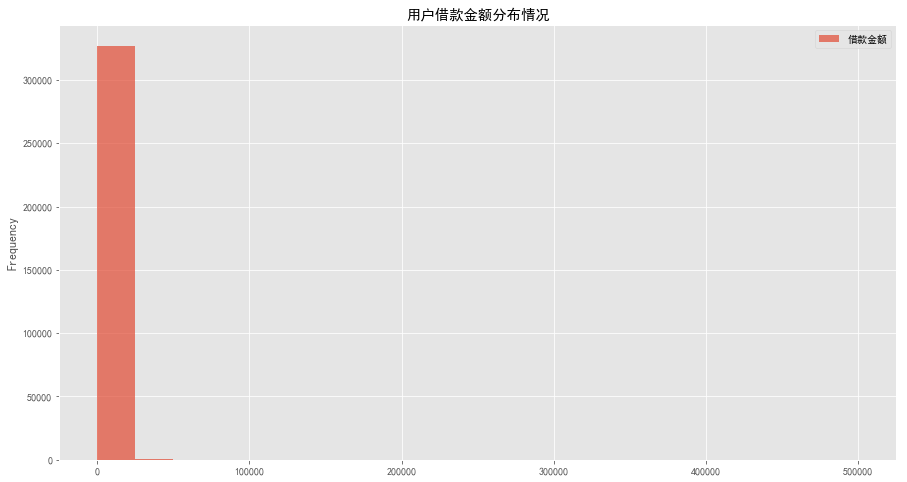

In [32]:
base_plot_distribute('借款金额')

由于借款金额极差太大，可限定在10000以内

Text(0.5, 1.0, '用户借款金额分布情况')

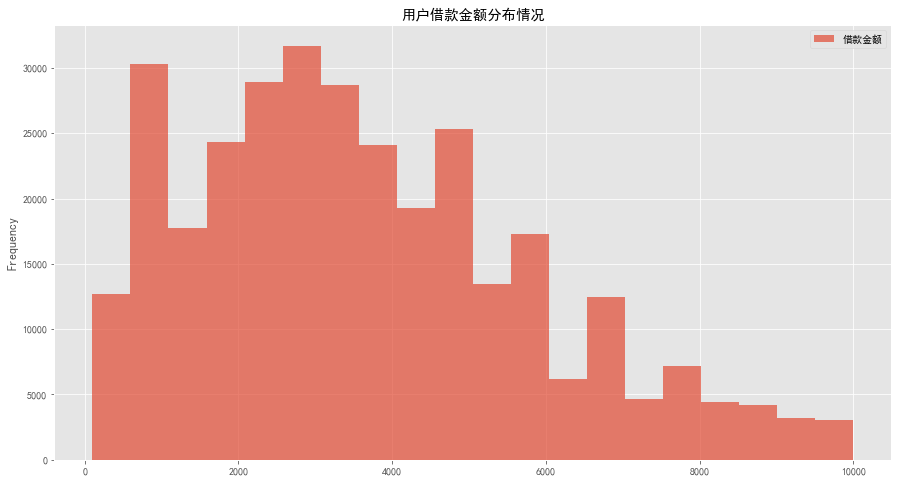

In [33]:
data=LC[LC['借款金额']<=10000]['借款金额']
data.plot.hist(bins=20,legend=True,alpha=0.7)
plt.title('用户借款金额分布情况')

可以看到：用户借款金额绝大多数在8000以内，且在2000-4000区间借款金额最多，即借贷多以小额借贷为主

### 3.1.2 年龄分布 

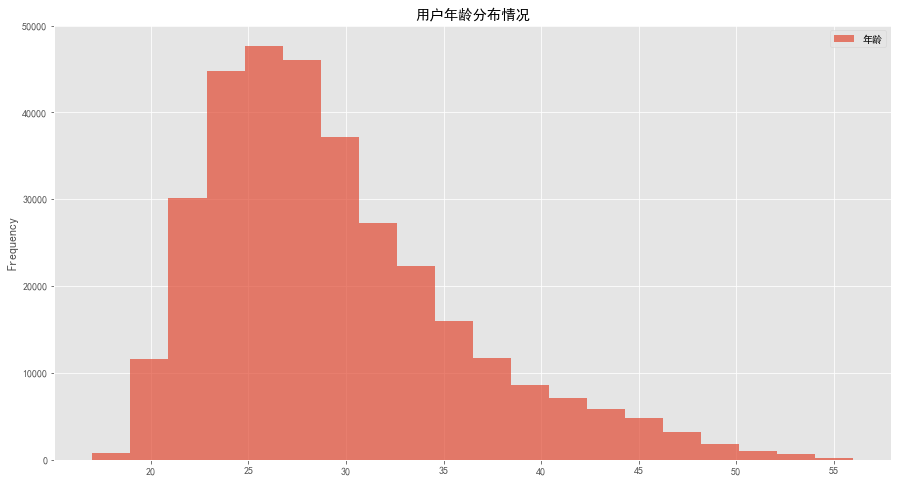

In [34]:
base_plot_distribute('年龄')

Text(0.5, 1.0, '用户年龄分布情况')

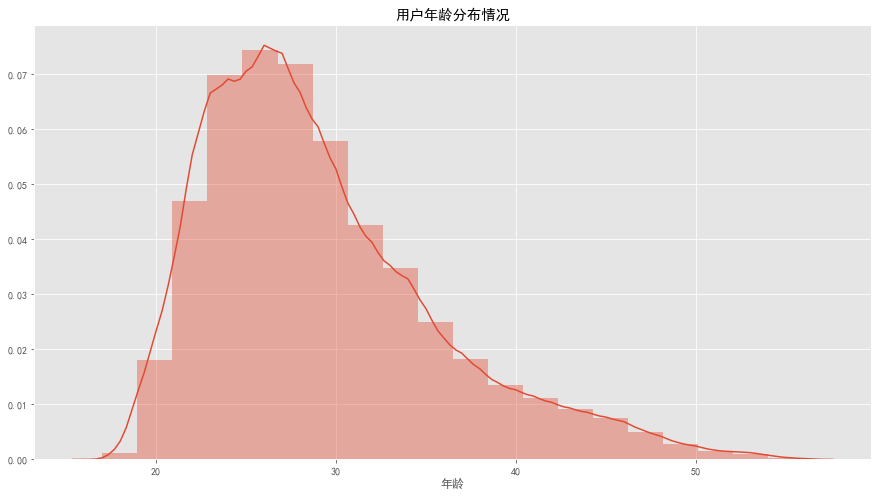

In [46]:
plt.subplot(1,1,1)
sns.distplot(LC['年龄'],bins=20)
plt.title('用户年龄分布情况')

可以看到：借款用户年龄绝大多数在20-35间，尤其在25-30之间人数最多，接近50000,可见青年是借贷主力  
且年龄分布整体近似服从正态分布，趋向于年轻化

### 3.1.3 历史成功借款次数

Text(0.5, 1.0, '用户历史成功借款次数分布情况')

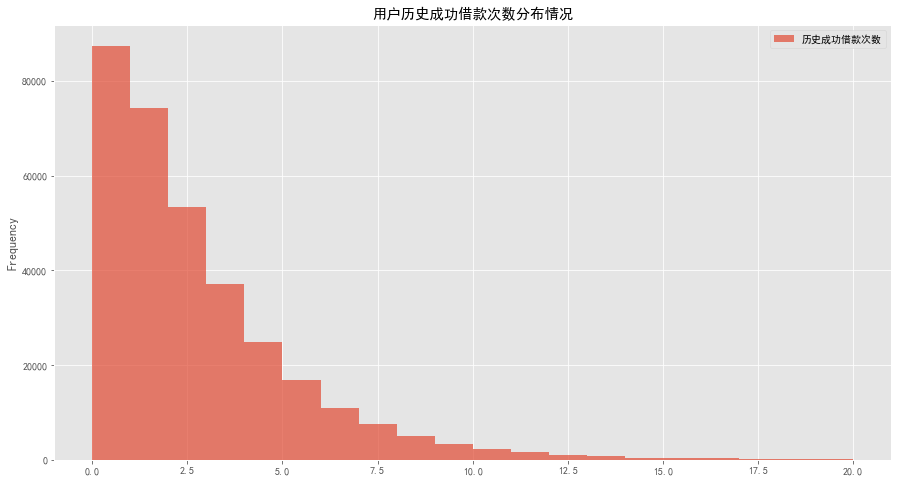

In [36]:
data=LC[LC['历史成功借款次数']<=20]['历史成功借款次数']
data.plot.hist(bins=20,legend=True,alpha=0.7)
plt.title('用户历史成功借款次数分布情况')

可以看到：绝大多数用户历史成功借款次数在10以内，且借款次数在5次以内的最多，说明散户的数量庞大  

### 3.1.4 历史成功借款金额分布

Text(0.5, 1.0, '用户历史成功借款金额分布情况')

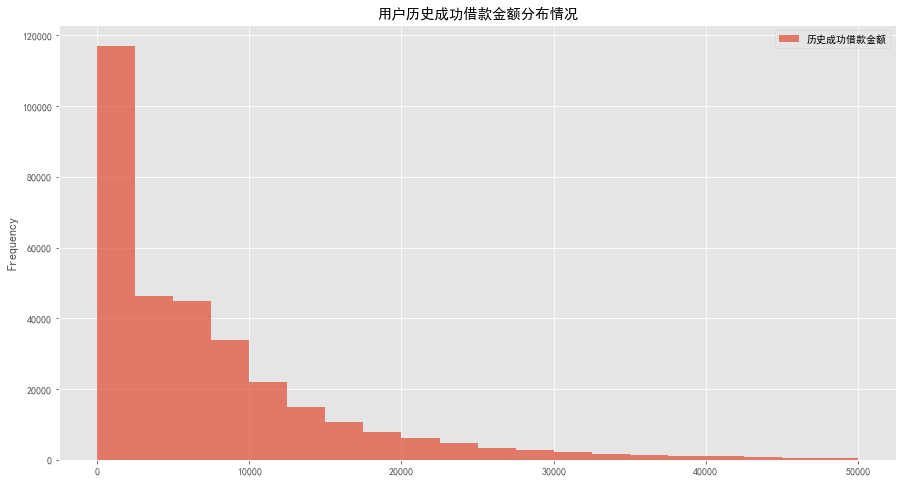

In [37]:
data=LC[LC['历史成功借款金额']<=50000]['历史成功借款金额']
data.plot.hist(bins=20,legend=True,alpha=0.7)
plt.title('用户历史成功借款金额分布情况')

可以看到：用户历史成功借款金额绝大多数在20000以内，且不借款或借款金额在5000以内的最多，即之前业务也是以小额借贷为主

### 3.1.5 总待还本金分布

Text(0.5, 1.0, '用户总待还本金分布情况')

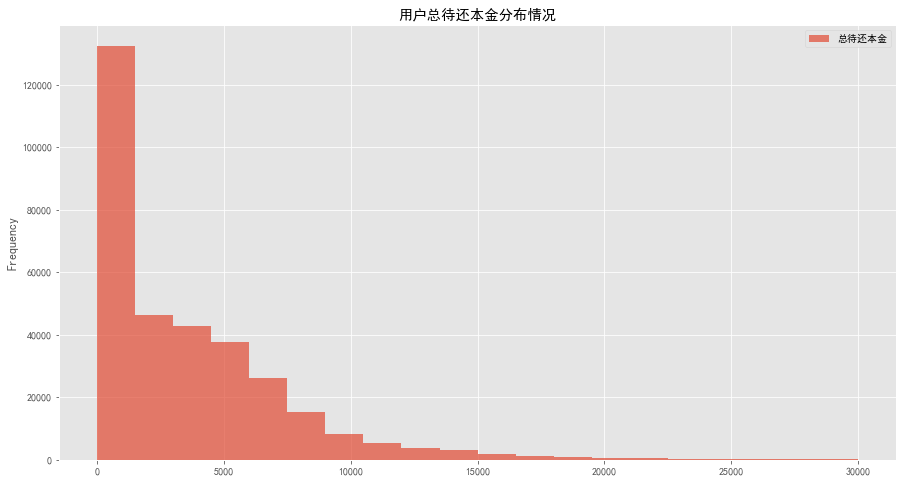

In [38]:
data=LC[LC['总待还本金']<=30000]['总待还本金']
data.plot.hist(bins=20,legend=True,alpha=0.7)
plt.title('用户总待还本金分布情况')

可以看到：用户总待还本金绝大多数在10000以内，且总待还本金在5000以内的居多  
还注意到，此分布与历史成功借款金额相似，可见当前标的分布情况与之前业务有一致性

### 3.1.6 用户历史逾期还款期数

Text(0.5, 1.0, '用户历史逾期还款期数分布情况')

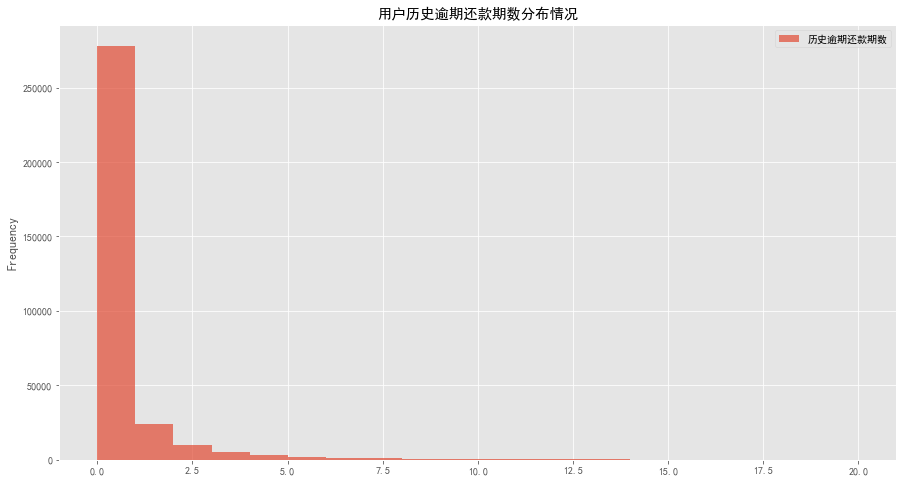

In [39]:
data=LC[LC['历史逾期还款期数']<=20]['历史逾期还款期数']
data.plot.hist(bins=20,legend=True,alpha=0.7)
plt.title('用户历史逾期还款期数分布情况')

可以看到：用户历史逾期还款期数绝大多数在5次以内，未逾期或逾期次数在2.5次内的最多，说明多数人信用良好，能在力所能及的范围内借贷  

### 3.1.7 用户借款期限组成

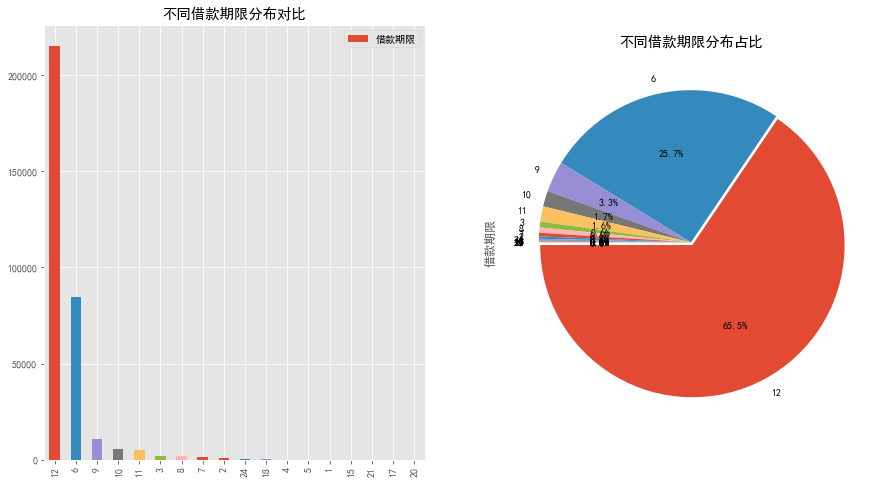

In [40]:
base_plot_form('借款期限')

可以看到：用户借款期限绝大多数是6期或12期，超过200000个标的借款期限是12期  
12期占比达到65.5%，6期达到25.7%，二者合计超过90%，即用户主流选择还是短期借贷

### 3.1.8 用户借款利率

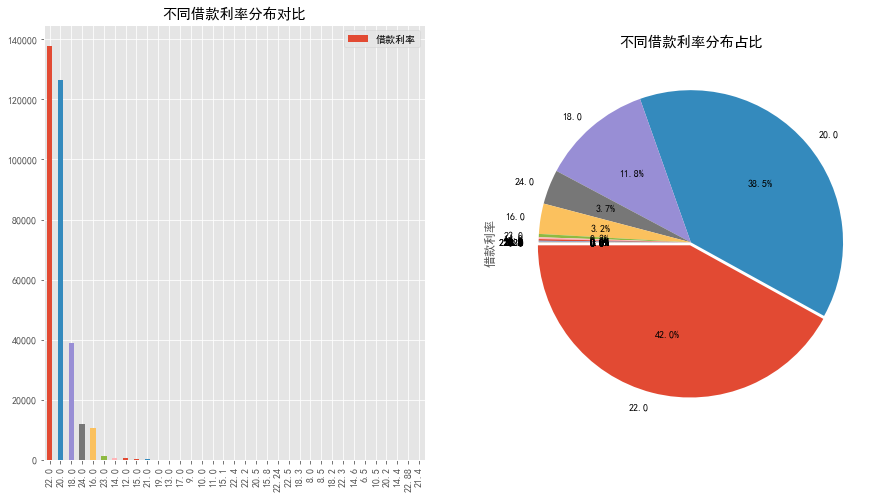

In [41]:
base_plot_form('借款利率')

可以看到：用户借款利率绝大多数是22%或者20%（年利率），这两种借款利率的标数目均超过120000  
利率为22%的标占比达到42.0%，20%的达到38.5%，18%的达到11.8%，这三种借款利率占比超过90%

### 3.1.9 用户性别组成

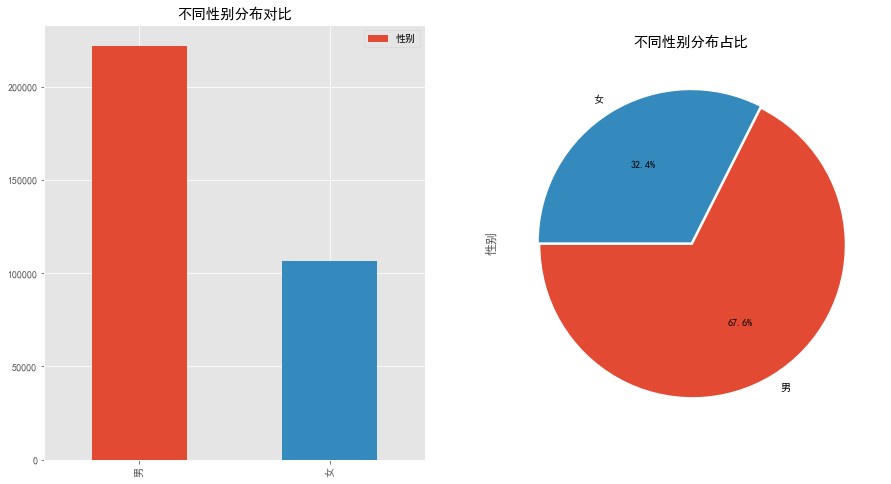

In [42]:
base_plot_form('性别')

可以看到：男性用户远多于女性，男性用户超过200000，而女性用户才100000出头  
男性用户占比达到67.6%，是女性占比32.4%的两倍多，说明男性用户借贷的需求大于女性

### 3.1.9 用户初始评级

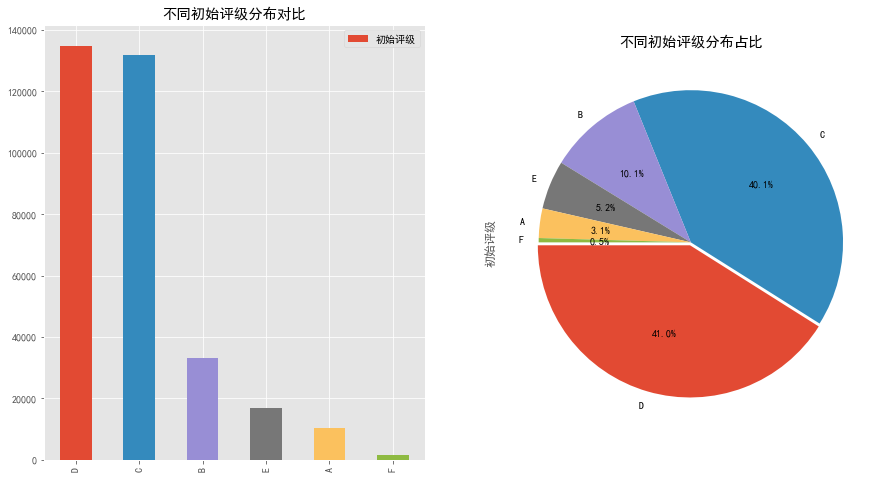

In [75]:
base_plot_form('初始评级')

可以看到：初始评级为C或D的用户最多，均超过120000  
初始评级D的占比达到41.0%，与C的40.1%相当，初始评级B的占了10.1%，三者占比超过90%，即拍拍贷的定级策略在D-B之间

### 3.1.10 用户认证类型

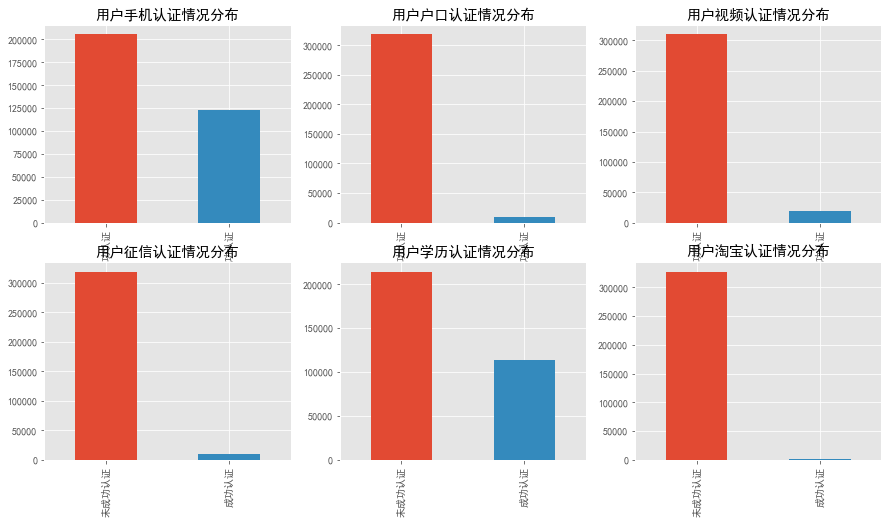

In [77]:
#对比六种认证类型
qualification=['手机认证','户口认证','视频认证','征信认证','学历认证','淘宝认证']
fig,ax=plt.subplots(nrows=2,ncols=3)
ax_list=[]
for iax in ax:
    for iiax in iax:
        ax_list.append(iiax)
        
for position,qualify in enumerate(qualification):
    LC[qualify].value_counts().plot.bar(ax=ax_list[position])
    ax_list[position].set_title('用户%s情况分布'%(qualify))

可以看到：  
* 无论哪种认证方式，用户未成功认证的数量远多于成功认证的数量
* 成功进行了手机认证的用户和学历认证的用户比较多，约有对应未认证用户的一半
* 其他类型的认证非常少，甚至几乎没有

### 3.1.11 用户认证成功项目数

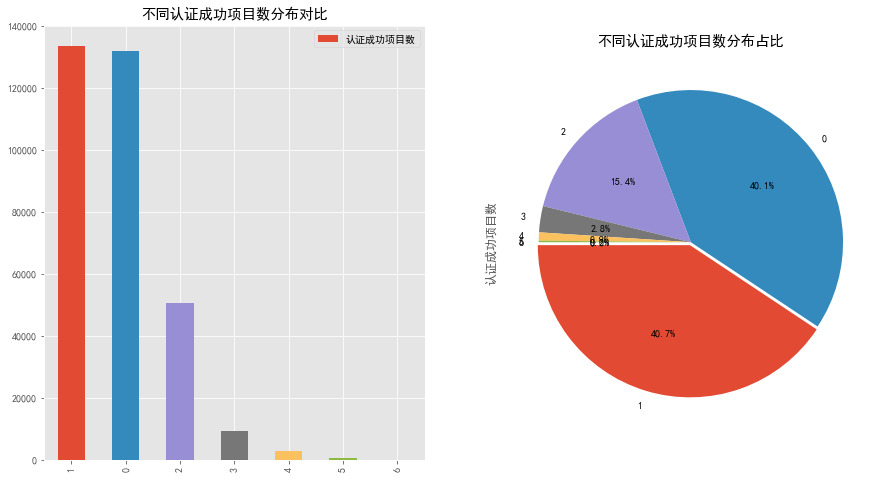

In [78]:
base_plot_form('认证成功项目数')

可以看出：
* 用户认证成功项目数仅1项或无任何认证的数量最多，均超过120000，而进行了2项认证的用户次之，超过40000
* 结合用户认证类型可知，进行手机认证的占各种项目数认证总数的40.7%，无认证的占40.1%，认证了手机和学历的占15.4%
* 用户认证项目数达到3项或3项以上的不到5%

### 3.1.12 用户借款类型

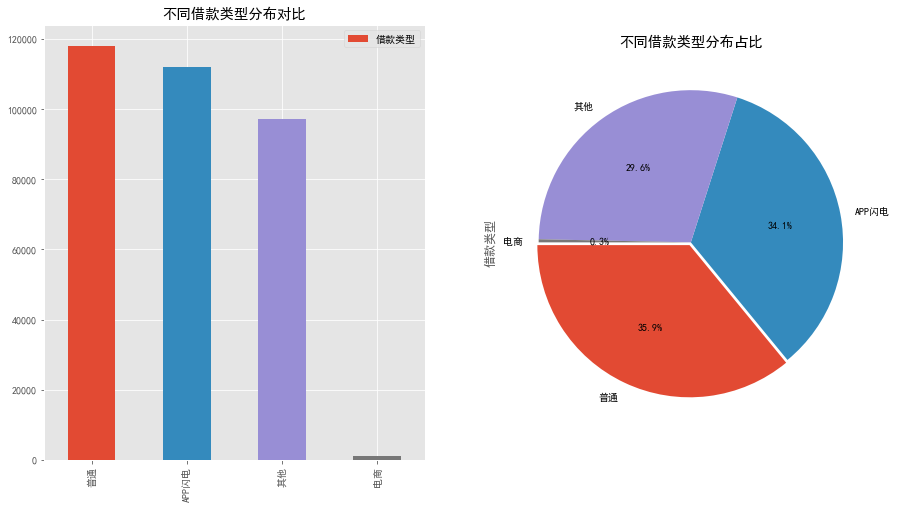

In [74]:
base_plot_form('借款类型')

可以看到：借款类型为普通和APP闪电的最多，均超过100000  
普通类型占比达到35.9%，与APP闪电的34.1%相当，通过电商借款的占比仅0.3%，即主流还是普通类型或APP闪电

### 3.1.13 用户是否首标

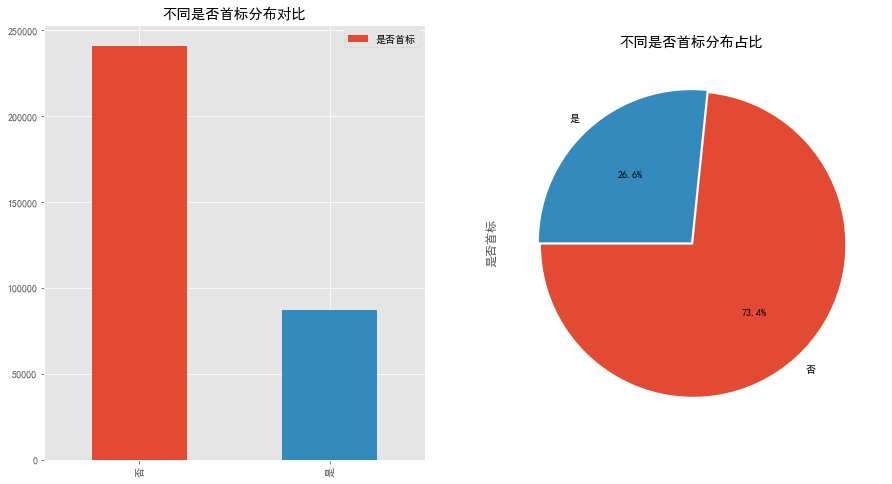

In [45]:
base_plot_form('是否首标')

可以看到：首标用户远少于非首标，非首标用户接近250000，而首标用户不到100000  
非首标用户占比达到73.4%，是首标用户占比26.6%的近三倍，说明成功借贷后的用户很大可能再次借贷

### 3.1.14 用户借款成功日期

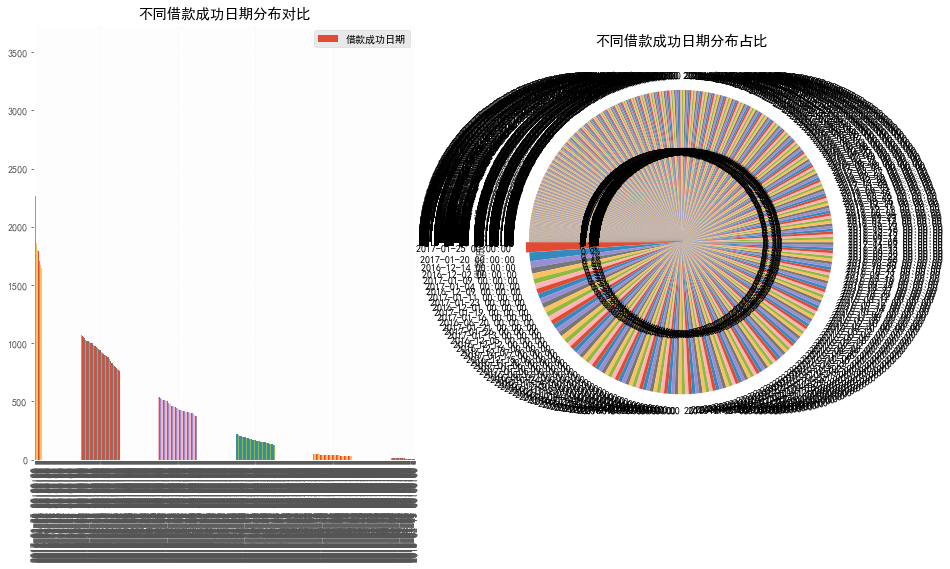

In [47]:
base_plot_form('借款成功日期')

借款日期区间为：
2015-01-01 00:00:00 至 2017-01-30 00:00:00


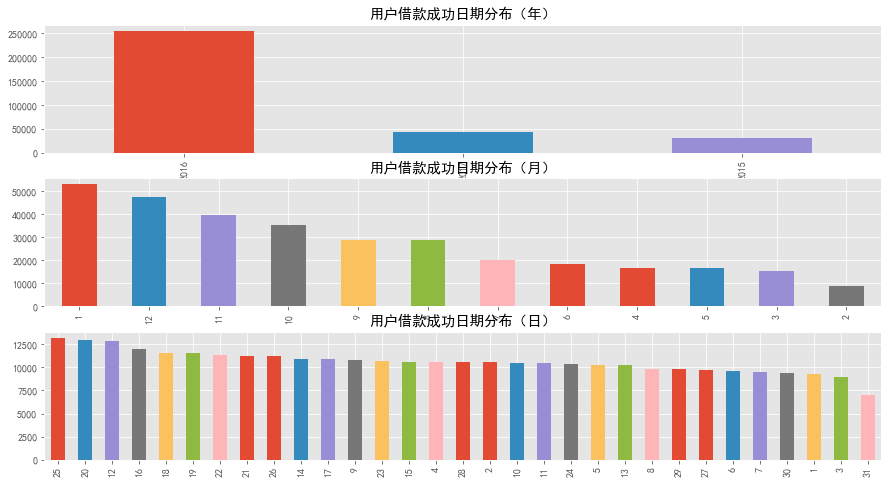

In [61]:
#应按照年月日指标分别绘图
fig,[ax1,
     ax2,
     ax3]=plt.subplots(nrows=3,ncols=1)
LC['借款成功日期'].dt.year.value_counts().plot.bar(ax=ax1)
ax1.set_title('用户借款成功日期分布（年）')
LC['借款成功日期'].dt.month.value_counts().plot.bar(ax=ax2)
ax2.set_title('用户借款成功日期分布（月）')
LC['借款成功日期'].dt.day.value_counts().plot.bar(ax=ax3)
ax3.set_title('用户借款成功日期分布（日）')

print('借款日期区间为：')
print(LC['借款成功日期'].min(),'至',LC['借款成功日期'].max())

可以看出：  
* 在年份上，2016年用户借款成功数最多，超过250000标，而2015最少，不到50000标，2017年仅有一个月的数据，    
就已经超过2015年整年，可见2016年增长迅速  
* 在月份上，11、12、1月借款成功数最多，均超过40000标，若扣除掉2017年1月份的数目，则2016年1月份借款成功数与2月份相当，  
而明显下半年的借款成功数要远高于上半年，尤其在年底，推测可能是因为过年的原因，导致花钱的需求变多了  
* 在日期上，分布比较均衡，由于不是每个月都有31号，所以31号这天的借款成功数相对少点

## 3.2 用户借款信息总体特征小结

结合上述分析，对借款用户的总体特征分布或组成**总结**如下：  
> * 用户以男性为主，男性用户占比达到67.6%，约为女性的两倍多，说明男性用户借贷的需求大于女性
> * 用户年龄绝大多数在20-35间，趋向于年轻化,可见青年是借贷主力
> * 用户初始评级为C或D的用户最多，拍拍贷的初始定级策略在D-B之间
> * 用户认证上，用户未成功认证的数量远多于成功认证的数量，进行了手机认证的用户和学历认证的用户比较多，约有对应未认证用户的一半
> * 用户认证数目上，无认证数目或只认证手机的占大部分，用户认证项目数达到3项或3项以上的不到5%
> * 多数用户本次借款非首标，非首标用户占比达到73.4%，是首标用户近三倍，说明成功借贷后的用户很可能再次借贷
> * 用户借款类型为普通和APP闪电的最多，普通类型与APP闪电的占比均超过30%，通过电商借款的占比仅0.3%，即主流还是普通或APP闪电
> * 用户借款成功日期上来看，下半年的借款成功数远高于上半年，且年底借款成功数最多
> * 用户借款金额绝大多数在8000以内，且在2000-4000区间借款金额最多，即借贷多以小额借贷为主
> * 用户借款期限绝大多数是6期或12期，分期12期占比达到65.5%，6期达到25.7%，二者合计超过90%，即用户主流选择还是短期借贷
> * 用户借款利率绝大多数是22%或者20%（年利率），利率为22%的标占比达到42.0%，20%的达到38.5%，18%的达到11.8%，这三种借款利率占比超过90%
> * 用户历史成功借款次数绝大多数在5次以内，说明散户的数量庞大
> * 用户总待还本金在5000以内的最多，金额分布与历史成功借款金额相似，可见当前标的分布情况与历史业务有一致性
> * 用户历史逾期还款期数中，未逾期或逾期次数在2.5次内的最多，说明多数人信用良好，能在力所能及的范围内借贷
> * 用户历史成功借款金额中，不借款或借款金额在5000以内的最多，即之前业务也是以小额借贷为主

## 3.3 违约用户的相关特征分析

Text(0.5, 1.0, '违约用户借款还清情况分布')

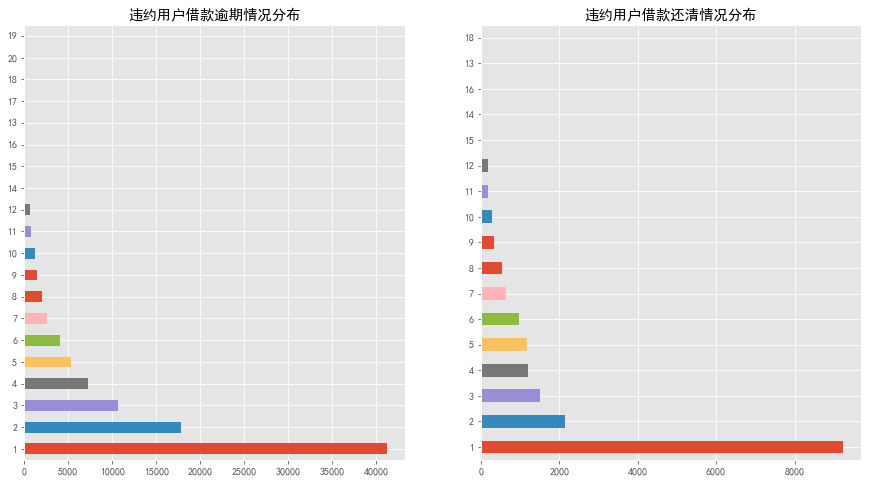

In [125]:
#观察违约用户分布情况
ax1=plt.subplot(121)
LCP[LCP['是否逾期']>0]['是否逾期'].value_counts().plot.barh(ax=ax1)
ax1.set_title('违约用户借款逾期情况分布')
ax2=plt.subplot(122)
LCP[LCP['是否还清']>0]['是否还清'].value_counts().plot.barh(ax=ax2)
ax2.set_title('违约用户借款还清情况分布')